In [1]:
import os, shutil

In [2]:
original_dataset_dir = './ml_datasets/kaggle_cats_dogs/train'

base_dir = './ml_datasets/cats_and_dogs_small'
os.mkdir(base_dir)

In [8]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


In [9]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)


validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)


test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    

In [11]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    

In [12]:
print('total training cat images: {}'.format(len(os.listdir(train_cats_dir))))
print('total training dog images: {}'.format(len(os.listdir(train_dogs_dir))))
print('')
print('total validation cat images: {}'.format(len(os.listdir(validation_cats_dir))))
print('total validation dog images: {}'.format(len(os.listdir(validation_dogs_dir))))
print('')
print('total test cat images: {}'.format(len(os.listdir(test_cats_dir))))
print('total test dog images: {}'.format(len(os.listdir(test_dogs_dir))))


total training cat images: 1000
total training dog images: 1000

total validation cat images: 500
total validation dog images: 500

total test cat images: 500
total test dog images: 500


In [13]:
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [20]:
import keras as k
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [29]:
import matplotlib
import matplotlib.pyplot as plt
from plot_functions import adjustAxeProperties
%matplotlib inline
matplotlib.style.use('ggplot')

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
for data_batch, labels_batch in train_generator:
    print('data_batch shape: {0:}'.format(data_batch.shape))
    print('labels_batch shape: {0:}'.format(labels_batch.shape))    
    break

data_batch shape: (20, 150, 150, 3)
labels_batch shape: (20,)


In [19]:
type(data_batch)

numpy.ndarray

In [37]:
def plot_history(history):
    FONTSIZE = 23
    plt.close('all')
    fig = plt.figure(figsize=(18, 7.5))
    gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1])

    epochs = range(1, len(history.history['loss']) + 1)

    # plot loss function
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    ax = plt.subplot(gs[0, 0])
    ax.plot(epochs, train_loss, marker='o', label='training loss')
    ax.plot(epochs, val_loss, marker='x', label='validation loss')
    ax.set_xlabel('epoch', fontsize=FONTSIZE, labelpad=15)
    ax.set_ylabel('Loss', fontsize=FONTSIZE, labelpad=15)
    ax.set_ylim(0)
    ax.set_xticks(np.arange(1, len(epochs)+1, 3))
    adjustAxeProperties(ax, FONTSIZE, 0, FONTSIZE, 0)
    ax.legend(loc='best', fontsize=FONTSIZE*0.85)
    ax.set_title('Loss fucntion', fontsize=FONTSIZE)


    # plot acuracy
    train_acuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    ax = plt.subplot(gs[0, 1])
    ax.plot(epochs, train_acuracy, marker='o', label='training acc.')
    ax.plot(epochs, val_accuracy, marker='x', label='validation acc.')
    ax.set_xlabel('epoch', fontsize=FONTSIZE, labelpad=15)
    ax.set_ylabel('Accuracy', fontsize=FONTSIZE, labelpad=15)
    ax.set_ylim(0, 1.05)    
    ax.set_xticks(np.arange(1, len(epochs)+1, 3))
    adjustAxeProperties(ax, FONTSIZE, 0, FONTSIZE, 0)    
    ax.legend(loc='best', fontsize=FONTSIZE*0.85)
    ax.set_title('Accuracy', fontsize=FONTSIZE)

    plt.tight_layout(w_pad=3.0, h_pad=1)    

### Build a ConvNet on the plain small dataset

In [21]:
model = k.models.Sequential()

model.add(k.layers.Conv2D(
    filters=32, 
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(150, 150, 3))
)
model.add(k.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(k.layers.Conv2D(
    filters=64,
    kernel_size=(3, 3),
    activation='relu')
)
model.add(k.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(k.layers.Conv2D(
    filters=128,
    kernel_size=(3, 3),
    activation='relu')
)
model.add(k.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(k.layers.Conv2D(
    filters=128,
    kernel_size=(3, 3),
    activation='relu')
)
model.add(k.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(k.layers.Flatten())
model.add(k.layers.Dense(512, activation='relu'))
model.add(k.layers.Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv

In [22]:
model.compile(
    loss='binary_crossentropy',
    optimizer=k.optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

In [24]:
model.save('cats_and_dogs_small_1.h5')

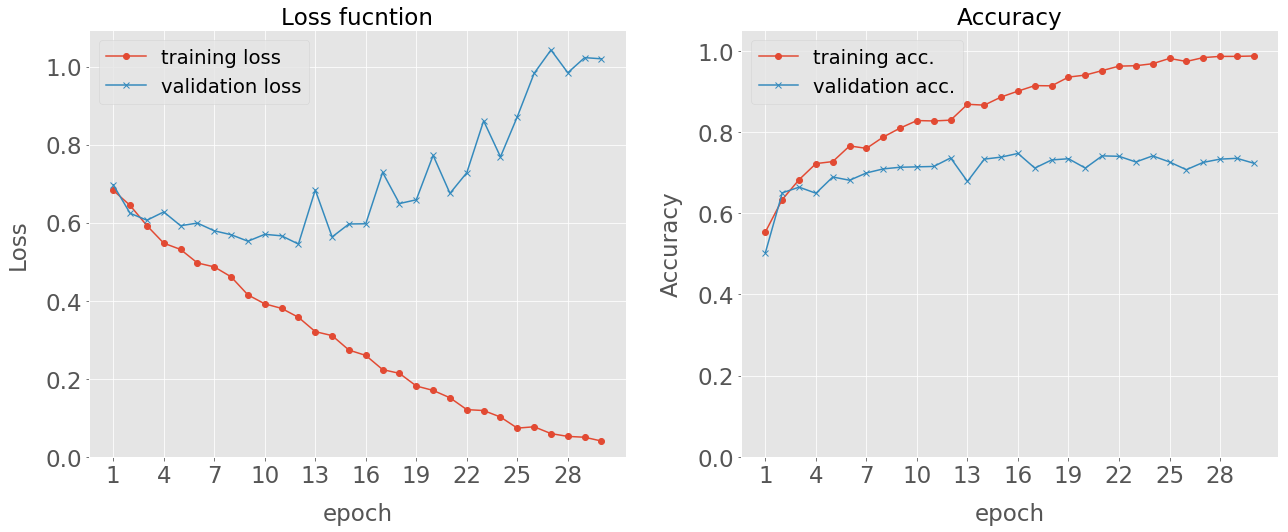

In [38]:
plot_history(history)